<img src="Escudo_uaustralchile.png" style="height=100px;display: block;margin-left:auto;margin-right:auto"/>

# Integrantes:
+ Kamila Gamboa (kamila dot gamboa at alumnos dot uach dot cl)
+ Valentina Valderas (valentina dot valderas at alumnos dot uach dot cl)

# Profesor y ayudante:
+ Victor Poblete
+ Esteban Vargas

# Fecha:
+ 19 de Julio del 2024

# Objetivos:
> + Explicar el proceso de ventaneo de una señal.
> + Crear una función que divida una señal en frames (ventanas).
> + Aplicar Transformada rápida de Fourier (Fast Fourier Transform (FFT)) a frames de la señal.
> + Realizar ventaneo y aplicar funciones correspondientes a diferentes tipos de audios.

+ Para poder realizar el ventaneo y posteriormente aplicar la FFT se importan las librerias necesarias.

In [1]:
import numpy as np
import librosa as lib
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy import signal
from scipy.fft import fft,ifft,fftshift

+ Para poder explicar el ventaneo y la transformada rápida de fourier, se necesita una señal de ejemplo. En este caso, se utilizará un audio.

In [2]:
sig,fs=lib.load("voice-near.wav",sr=44100)

+ La señal elegida, tiene el siguiente plot.

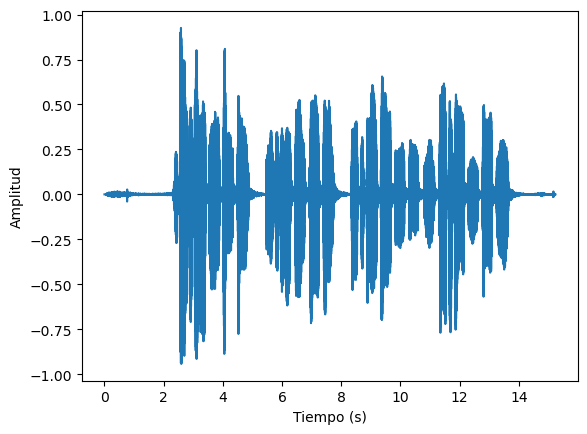

In [3]:
t=np.linspace(0,len(sig)/fs,len(sig))
plt.plot(t,sig);
plt.xlabel("Tiempo (s)");
plt.ylabel("Amplitud");

+ Para dividir la señal en frames (ventanas) se necesita de una función

In [4]:
def frames(x,nfft,overlap):
    x=x.tolist()
    num_f=int(round(len(x)/(nfft-(nfft*overlap))))
    print(num_f)
    matriz_frames=[]
    for i in range(num_f):
        frame=x[i*round(nfft*overlap):i*round(nfft*overlap)+nfft]
        while len(frame)<nfft:
            frame.append(0)
        matriz_frames.append(frame)
    matf=np.array(matriz_frames)
    return matf

+ Ahora, como muestra la función, se necesita de 3 variables; la señal, el largo del que se quiere cada ventana (nfft) y el porcentaje de traslape (overlap).
+ Además, para suavizar cada frame, con el fin de que no se duplique información, se necesita una función ventana (window). En este caso se utilizará la función de Hann para el mismo largo de cada frame (nfft).

In [5]:
nfft=1024
overlap=0.5
window = signal.windows.hann(nfft)

+ Ya teniendo la función y habiendo fijado los valores de las variables, se aplica la función de ventaneo para dividir en frames y la función de ventana, que "suaviza" el inicio y final de cada frame, a todos los frames.

In [6]:
sig_frames=frames(sig,nfft,overlap)
matriz_frames=np.multiply(sig_frames,window)

1312


+ Ahora se puede graficar un frame de la señal con la función ventana. En este caso, se utilizará como ejemplo el frame 600.

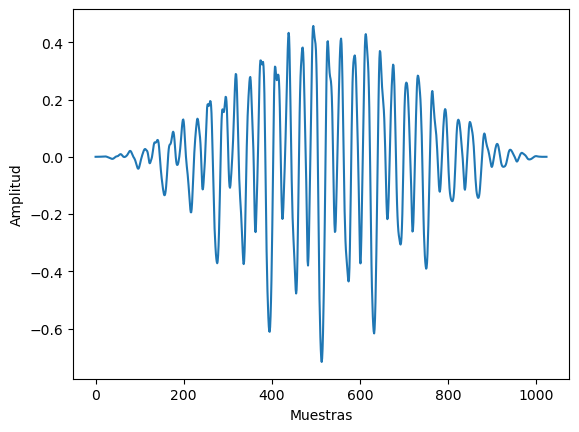

In [7]:
frame=600
plt.plot(matriz_frames[frame])
plt.xlabel("Muestras");
plt.ylabel("Amplitud");

+ Ahora, se puede aplicar la transformada rápida de Fourier a cada frame de la siguiente forma.

In [8]:
matrizfft=fft(matriz_frames,n=nfft,axis=1)

+ En esta nueva matriz, se calcula la magnitud de cada frame.

In [9]:
magmatrizfft=np.abs(matrizfft)

+ Finalmente, se puede graficar el espectrograma del frame seleccionado anteriormente.

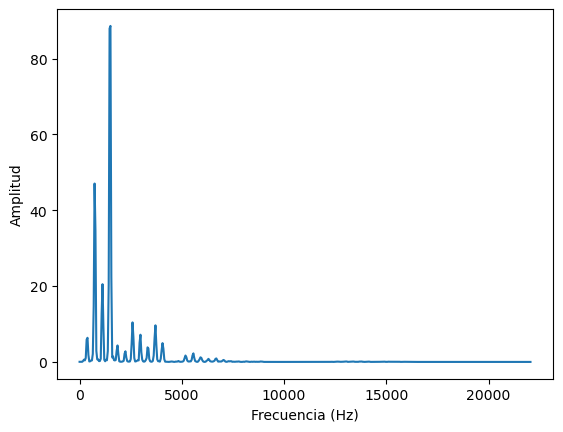

In [10]:
b=np.linspace(0,fs//2,nfft//2)
plt.plot(b,magmatrizfft[frame,0:nfft//2]);
plt.xlabel("Frecuencia (Hz)");
plt.ylabel("Amplitud");

+ Además, se puede graficar el espectrograma de toda la señal de audio.

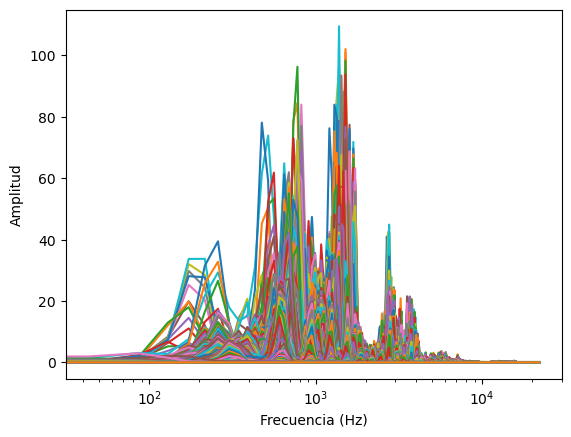

In [11]:
magmatrizfftmitad=magmatrizfft[:,0:nfft//2]
fig,ax = plt.subplots(1,1)
ax.plot(b,magmatrizfftmitad.T);
ax.set_xscale("log");
ax.set_xlabel("Frecuencia (Hz)");
ax.set_ylabel("Amplitud");